#	Some tries to check whether principal components are correlated

In [1]:
import sys
import lalsimulation as lalsim
import lal
sys.path.insert(1, '/home/stefano/Desktop/Stefano/scuola/uni/tesi_magistrale/code/routines')
from GW_helper import *
import matplotlib.pyplot as plt
from ML_routines import *

In [16]:
folder = "GW_TD_dataset/"
train_theta = np.loadtxt("../datasets/"+folder+"PCA_train_theta_full.dat")
test_theta = np.loadtxt("../datasets/"+folder+"PCA_test_theta_full.dat")
PCA_train_ph = np.loadtxt("../datasets/"+folder+"PCA_train_full_ph.dat")
PCA_test_ph = np.loadtxt("../datasets/"+folder+"PCA_test_full_ph.dat")
PCA_train_amp = np.loadtxt("../datasets/"+folder+"PCA_train_full_amp.dat")
PCA_test_amp = np.loadtxt("../datasets/"+folder+"PCA_test_full_amp.dat")

<IPython.core.display.Javascript object>


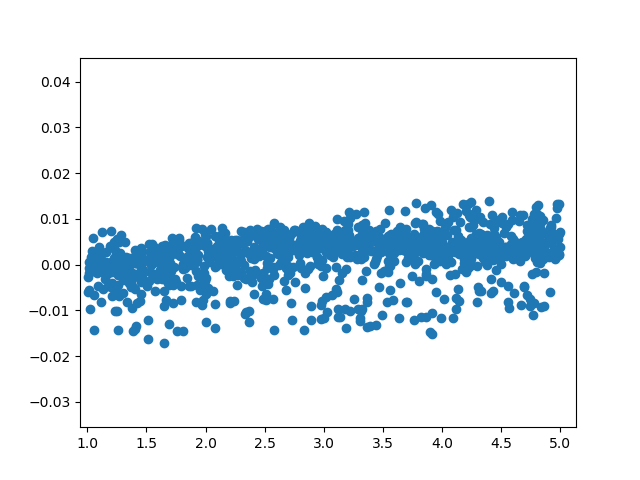

In [73]:
%matplotlib notebook
plt.plot(test_theta[:,0],PCA_test_ph[:,3], 'o')
plt.show()

In [71]:
print(train_theta[np.where(PCA_train_ph[:,3]<-0.1)])

[[ 4.96836546 -0.78638034  0.03368877]
 [ 4.87589541 -0.74086812 -0.76092915]
 [ 4.85942305 -0.72825756 -0.60707037]
 [ 4.90044575 -0.76214927 -0.77910428]
 [ 4.25501967 -0.80935973 -0.74547187]
 [ 4.94723352 -0.79006958 -0.43552112]
 [ 4.61130901 -0.74371375 -0.74265882]
 [ 4.59999116 -0.81387727 -0.73004378]
 [ 4.20928215 -0.80096765 -0.64274174]
 [ 4.79607146 -0.81537753 -0.66359671]
 [ 4.92051169 -0.79183661 -0.44836728]
 [ 4.60993184 -0.76549325 -0.72091419]
 [ 4.36787312 -0.80931908 -0.4755964 ]
 [ 4.99177037 -0.66258999 -0.74848304]
 [ 4.87660011 -0.77719825 -0.78107278]
 [ 4.33058553 -0.79813853 -0.47997007]
 [ 4.85619968 -0.70614736 -0.66189592]
 [ 4.52058037 -0.80011023 -0.34255225]
 [ 4.78945183 -0.746586   -0.66927985]
 [ 4.85436448 -0.7664799  -0.39932632]
 [ 4.02320284 -0.80997002 -0.71000765]
 [ 4.64487128 -0.81154969 -0.47668645]
 [ 4.99652469 -0.68634876 -0.63697512]
 [ 4.79978809 -0.81689297 -0.07320432]
 [ 4.61584005 -0.75062162 -0.6108306 ]
 [ 4.95203526 -0.80528096

In [70]:
train_indices = np.where((np.multiply(test_theta[:,1]<-0.74, test_theta[:,0]>4.5)))
print(indices)
print(test_theta[indices,:])

(array([   0,    9,   14,   49,  270,  336,  343,  352,  738,  803,  945,
       1111, 1173]),)
[[[ 4.80022721 -0.80347837  0.58890782]
  [ 4.87520659 -0.7423229  -0.38250247]
  [ 4.81683267 -0.79571043  0.23294021]
  [ 4.75060651 -0.8112561  -0.01865574]
  [ 4.9741783  -0.72033456  0.05900767]
  [ 4.78383553 -0.72720095 -0.4643835 ]
  [ 4.78939111 -0.81192943  0.05857168]
  [ 4.97510452 -0.74656653 -0.03467654]
  [ 4.50909388 -0.72641477  0.77890069]
  [ 4.6878836  -0.75756799  0.69604681]
  [ 4.97278994 -0.81271173  0.10670977]
  [ 4.97039741 -0.71803399  0.63867636]
  [ 4.58042863 -0.8163865  -0.71072592]]]


In [63]:
print(test_theta[:,0])

[4.80022721 1.78876607 2.2665763  ... 3.29358998 2.97438709 3.86345388]
